# Filtro Gaussiano
#Daniel Anderson de Souza Leite
#Engenharia de Telecomunicações - IFCE
#Sistemas Multimídia
#Prof. Dr. Pedrosa

# Bibliotecas 

In [122]:
import cv2 #OpenCV
import numpy as np #biblioteca para trabalhar com arrays de maneira eficiente
import matplotlib.pyplot as plt # biblioteca para plotar gráficos
import math
from copy import copy

# Leitura da imagem

In [123]:
img = cv2.imread('C:/Users/danie/Desktop/Scripsts Python/figs/ruido.png', cv2.IMREAD_GRAYSCALE)

#Mostra o tamanho da imagem
print("Tamanho da imagem")
np.shape(img)

Tamanho da imagem


(229, 280)

# Imagem com borda de preenchimento espelhado otimizada para filtro vizinhaça-N

In [124]:
#Recebe uma matriz e acrecenta bordas espelhadas
def preencher(imagem):
    #Recebe o tamanho da imagem e coloca nas variáveis m e n para uso posterior
    (m,n)=np.shape(imagem)

    # m número de linhas, n número de colunas. Soma de mais duas linhas(cime e baixo) e de duas colunas(esquerda e direita) para apliar a matrir devido ao preenchimento de borrda de vizinhaça-8.
    m=m+2
    n=n+2  

    #Cria uma matriz de zeros ampliada de duas linhas e duas colunas a mais. São as arestas acrescentadas devido ao kernel.
    imgpre=np.zeros((m,n), dtype=np.uint8)
    

    #Clone da imagem original para a imagem apliada com espelho das arestas e vértices (Preenchimento)

    #Arestas
    #Parte superior
    for p in range(0, n-2):
        imgpre[0][p+1] = imagem[0][p]
    #Parte inferior
    for q in range(0, n-2):
        imgpre[m-1][q+1] = imagem[m-3][q]
    #Parte esquerda
    for r in range(0, m-2):
        imgpre[r+1][0] = imagem[r][0]
    #Parte direita
    for s in range(0, m-2):
        imgpre[s+1][n-1] = imagem[s][n-3]

    #Vértices
    #Diagonal superior-esquerda
        imgpre[0][0] = imagem[0][0]
    #Diagonal Superior-direita
        imgpre[0][n-1] = imagem[0][n-3]
    #Diagonal Inferior-esquerda
        imgpre[m-1][0] = imagem[m-3][0]
    #Diagonal Inferior-direita
        imgpre[m-1][n-1] = imagem[m-3][n-3]

    #Face 
    for k in range(0,m-2):
        for l in range(0, n-2):
            imgpre[k+1][l+1] = imagem[k][l]
    return imgpre

# Kernel Gaussiano em float

In [125]:
#vizinhaça ímpar 8 , 24, 48, 80, ..., 440... (x*y)-1

n=24 #Vizinhaça do Kernel. Parâmetro alterável!

tam_kernl=int(math.sqrt(n+1))#Tamanho do kernel em linhas ou colunas. E.g.: vizinhaça-8 tem 3 linhas ou colunas.
num_iteracoes=int((tam_kernl-1)/2)#Númermo de interações para a função de preenchimento.
imgmat=copy(img)  # Verificar se não há problemas com tipo
for itera in range(num_iteracoes):# A cada itereção a matriz imgmat recebe um preenchimento de bordas.
    imgmat=preencher(imgmat) 


In [138]:
#Kernel vizinhaça-N Gaussiana
desv=2 #Quanto maior o desvio, mais platicurtica.
knl=np.zeros((tam_kernl,tam_kernl), dtype=np.float32)

sum_pesos=0# instancia a variável com zero. Cáculo posterior.

# Calcula a distribuição Gaussiana do Kernel
for lin in range(0,tam_kernl): 
    for col in range(0,tam_kernl):
        knl[lin][col]=np.exp(-(((lin-num_iteracoes)**2+(col-num_iteracoes)**2)/(2*(desv**2))))
        sum_pesos+=knl[lin][col]#calcula a soma dos pesos do kernel
temp=copy(knl)# Variável temporária igual ao kernl (knl) que será usada para realizar o processamento.

print("Kernel: desv:2")
print(np.around(knl, decimals=2))

Kernel: desv:2
[[0.37 0.54 0.61 0.54 0.37]
 [0.54 0.78 0.88 0.78 0.54]
 [0.61 0.88 1.   0.88 0.61]
 [0.54 0.78 0.88 0.78 0.54]
 [0.37 0.54 0.61 0.54 0.37]]


# Imagem de saída

In [127]:
#Recebe o tamanho da imagem original
(c,d)=np.shape(img)

#Cria uma matriz de zeros do mesmo tamanho da img original
imgout=np.zeros((c,d), dtype=np.uint8)


#Tamanho da imagem de saída
print("Tamanho da imagem:")
np.shape(imgout)

Tamanho da imagem:


(229, 280)

# Processamento Filtro Gaussiano

In [128]:
#Recebe o tamanho da imagem ampliada de arestas para realizar o processamento.
(t,v)=np.shape(imgmat)

#Varre a imagem ampliada realizando a convolução do do kernel com saída na imgout (imagem de saída).
num_bordas=num_iteracoes
sum=0
#Varre a imagem
for x in range(num_bordas,t-num_bordas):
    for y in range(num_bordas, v-num_bordas):
        #Varre a interseção do kernel com a imagem somando todos os valores alterados pelos pesos da gaussiana
        for linha in range(0,tam_kernl):
            for coluna in range(0,tam_kernl):
                temp[linha][coluna]*=imgmat[x-num_bordas+linha][y-num_bordas+coluna]  
                sum+=temp[linha][coluna]
        temp=copy(knl) 
        imgout[x-num_bordas][y-num_bordas] = int(sum*(1/sum_pesos))#Realiza a média ponderada pela gaussiana e preenche o resultada da imagem de saída no pixel que está sendo processado.
        sum=0

In [129]:
# Pixels intensity da imagem de saída
print('\n'+"Pixels intensity da imagem de saída")
print('Max value: {}'.format(imgout.max()))
print('Min value: {}'.format(imgout.min()) +'\n')


#Mostra parcialmente a imagem de saída
print('\n'+'\n'+"Matriz da imagem de saída:")
print(imgout)


Pixels intensity da imagem de saída
Max value: 206
Min value: 22



Matriz da imagem de saída:
[[111 112  87 ... 116  78  82]
 [ 94  75  69 ...  98  74  80]
 [ 80  68  82 ...  84  79  90]
 ...
 [141 157 156 ...  85  84  51]
 [180 185 165 ...  72  73  61]
 [200 186 171 ...  76  74  68]]


# Imagem de entrada para comparação

In [130]:
# Pixels intensity da imagem original
print('\n'+"Pixels intensity da imagem de entrada")
print('Max value: {}'.format(img.max()))
print('Min value: {}'.format(img.min())+'\n')

#Mostra parcialmente a imagem original para fins de comparação
print("Matriz da imagem de entrada:")
print(img)


Pixels intensity da imagem de entrada
Max value: 237
Min value: 0

Matriz da imagem de entrada:
[[112 123  86 ... 127  72  84]
 [ 97  70  62 ... 103  67  81]
 [ 79  57  77 ...  84  83  91]
 ...
 [135 158 158 ...  95  94  41]
 [182 194 164 ...  68  73  61]
 [205 185 175 ...  74  76  69]]


# Exibição pela matplotlib.pyplot

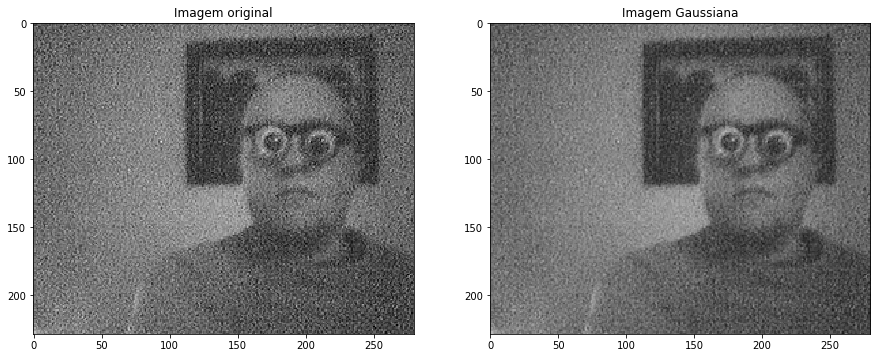

In [131]:
########## Using matplotlib #################

plt.figure(1, [15, 15])
plt.subplot(121), plt.imshow(img, vmin=0, vmax=255, cmap='gray')
plt.subplot(121).set_title('Imagem original')
plt.subplot(122), plt.imshow(imgout, vmin=0, vmax=255, cmap='gray')
plt.subplot(122).set_title('Imagem Gaussiana')

plt.show()

# Exibição pela Open CV

In [114]:
# Exibe a imagem de saída pela opencv em uma janela
cv2.imshow("Gaussiana", imgout)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [15]:
# Exibe a imagem de entrada pela opencv em uma janela
cv2.imshow("Imagem Original", img)
cv2.waitKey(0)

-1

# Histograma

Histograma da Gaussiana:


<StemContainer object of 3 artists>

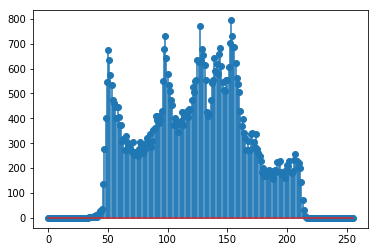

In [28]:
# Using opencv
# Mostra o histograma da imagem de saída
hist = cv2.calcHist([imgout], [0], None, [256], [0,256])
hist = hist.reshape((hist.shape[0],))
print("Histograma da Gaussiana:")
plt.stem(hist)

Histograma da imagem original:


<StemContainer object of 3 artists>

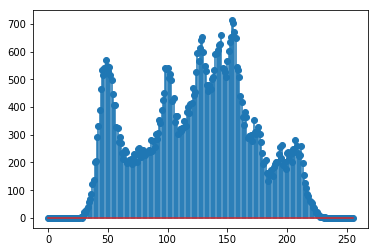

In [29]:
# Mostra o histograma da imagem original
hist = cv2.calcHist([img], [0], None, [256], [0,256])
hist = hist.reshape((hist.shape[0],))
print("Histograma da imagem original:")
plt.stem(hist)

# Savar a imagem processada

In [57]:

cv2.imwrite('C:/Users/danie/Desktop/Scripsts Python/figs/Arquivos processados/gaussiana.png', imgout)

True